<a href="https://colab.research.google.com/github/MiguelSanz2/APRENDIZAJE_AUTOMATICO_23_24/blob/main/framingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 07:** Componentes: *texto en cursiva*

- Carlos Adaro Cacho
- Juan Rivera Sánchez
- Miguel Sanz Almau

#**Introducción**
Las enfermedades cardíacas representan una carga significativa para la salud global, siendo una de las principales causas de enfermedad y mortalidad en todo el mundo. Según la Organización Mundial de la Salud (OMS), se estima que aproximadamente 12 millones de personas mueren cada año debido a enfermedades cardíacas. En países desarrollados, como Estados Unidos, la mitad de las muertes están vinculadas a enfermedades cardiovasculares. Ante esta alarmante realidad, la identificación temprana de factores de riesgo y la predicción del riesgo de enfermedad cardíaca pueden desempeñar un papel crucial en la toma de decisiones médicas y en la implementación de cambios en el estilo de vida.

Este proyecto se enmarca en un estudio continuo sobre enfermedades cardiovasculares realizado en la ciudad de Framingham, Massachusetts. La clasificación objetivo de este proyecto es predecir si un paciente tiene un riesgo de enfermedad coronaria en los próximos 10 años. Los datos utilizados provienen de esta investigación en curso y proporcionan información detallada sobre diversos factores demográficos, comportamentales y médicos que podrían influir en el desarrollo de enfermedades cardíacas.

Con este proyecto se propone abordar el desafío de identificar los factores más relevantes y de predecir el riesgo general de enfermedad cardíaca mediante el uso de técnicas de aprendizaje automático, en particular,  utiliza una red neuronal para realizar tareas de clasificación binaria. Al comprender mejor estos factores y al desarrollar un modelo preciso de predicción, se busca contribuir al avance en la detección temprana y en la toma de decisiones clínicas para reducir las complicaciones asociadas con las enfermedades cardiovasculares.

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers, regularizers
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import LearningRateScheduler
from google.colab import drive
drive.mount('/content/drive')



# Define la métrica F1 directamente en Keras
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Resumen del Conjunto de Datos:**

El conjunto de datos utilizado en este proyecto proviene de un estudio cardiovascular en curso en la ciudad de Framingham, Massachusetts, y está disponible públicamente en el sitio web de Kaggle. El objetivo de clasificación es predecir si un paciente tiene un riesgo de enfermedad coronaria en los próximos 10 años. A continuación, se resumen las variables presentes en el conjunto de datos:

Variables:

Sexo: Masculino (1) o Femenino (0)

* Edad: Edad del paciente.

* Current Smoker: Si el paciente es fumador actual o no.

* Cigs Per Day: Número de cigarrillos que la persona fuma en promedio en un día.

* BP Meds: Si el paciente estaba tomando medicamentos para la presión arterial.

* Prevalent Stroke: Si el paciente había tenido previamente un derrame cerebral.

* Prevalent Hyp: Si el paciente era hipertenso o no.

* Diabetes: Si el paciente tenía diabetes o no.

* Tot Chol: Nivel de colesterol total.

* Sys BP: Presión arterial sistólica.

* Dia BP: Presión arterial diastólica.

* BMI: Índice de masa corporal.

* Heart Rate: Ritmo cardíaco.

* Glucose: Nivel de glucosa.

* 10-year risk of coronary heart disease (CHD): Riesgo de enfermedad coronaria en 10 años.

In [ ]:
# Cargar los datos desde el DataFrame proporcionado
# Supongo que la columna 'clase' es la variable objetivo que deseas predecir
mainpath = "drive/MyDrive/DATASET"
filename = "framingham1.xlsx"
fullpath = os.path.join(mainpath,filename)
df = pd.read_excel(fullpath)
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Podemos observar la presencia de algunos valores NAN, como hemos tomado la decisión de que esas variables si son importantes a la hora de predecir un ataque al corazón. Hemos decidido imputarlos, es decir, rellenar o completar los valores faltantes con algún tipo de estimación o valor predeterminado.

Para ello utiliaremos más adelante 'SimpleImputer' que es una clase en la biblioteca scikit-learn que se utiliza para manejar valores faltantes (NaN) en conjuntos de datos. Su función principal es la imputación.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


El resultado del 'df.describe()' proporciona estadísticas descriptivas para cada columna numérica en tu conjunto de datos.

**Observaciones**:

* Conteo (count):

 Muestra el número de valores no nulos en cada columna. Por ejemplo, para la columna education, hay 4135 valores no nulos, lo que indica que hay algunos valores faltantes.
* Media (mean):

 Representa el valor promedio de cada columna. Por ejemplo, la media de la columna male es aproximadamente 0.429, lo que indica que alrededor del 43% de los pacientes son hombres.
* Desviación Estándar (std):

 Mide la dispersión de los valores alrededor de la media. Por ejemplo, la desviación estándar de la columna age es aproximadamente 8.57, lo que indica que la edad de los pacientes tiende a variar en torno a 8.57 años respecto a la media.
* Valores Mínimos y Máximos (min y max):

 Muestran los valores mínimo y máximo en cada columna. Por ejemplo, en la columna age, el paciente más joven tiene 32 años, mientras que el paciente más viejo tiene 70 años.
* Cuartiles (25%, 50%, y 75%):

 Representan los percentiles 25, 50 (mediana), y 75, respectivamente. Por ejemplo, el 25% de los pacientes tienen una edad inferior a 42, el 50% tienen una edad inferior a 49, y el 75% tienen una edad inferior a 56.


# **MÉTODOS**

El código es  una implementación de aprendizaje automático utilizando una red neuronal con TensorFlow y Keras para predecir el riesgo de enfermedad cardíaca en función de diversas características.

***Justificación de la arquitectura de la red:***

La elección de una red neuronal con capas densas es adecuada para problemas de clasificación binaria como este(predecir el riesgo de enfermedad cardíaca). Las capas densas permiten conexiones completas entre todas las neuronas de capas adyacentes, lo que facilita la captura de patrones complejos en los datos.
La cantidad de nodos en cada capa se decide en base a la complejidad del problema y la cantidad de datos disponibles. En este caso, se han elegido capas con 128, 64, y 32 nodos, seguidos de una capa de salida con 1 nodo para la clasificación binaria. Estas cantidades pueden proporcionar suficiente capacidad para aprender patrones de los datos sin sobreajustar.

***1. Escalar las características (variables)***

 Se realizan en los conjuntos de datos de entrenamiento y prueba. Escalar las características es una práctica común en el preprocesamiento de datos para modelos de aprendizaje automático, especialmente cuando estamos trabajando con redes neuronales.

La razón principal detrás de la escalada de características es asegurar que todas las variables tengan la misma escala. Las redes neuronales y muchos otros algoritmos de aprendizaje automático pueden beneficiarse de datos que están en la misma escala.

***2. Tratamiento de valores faltantes:***

El SimpleImputer con estrategia 'mean' es una elección razonable para tratar los valores faltantes. Al sustituir los valores NaN con la media de las columnas respectivas, podemos evitar la pérdida de información y mantener la coherencia en los datos. Esto es especialmente útil si la cantidad de valores faltantes no es grande y si asumimos que los valores promedio son una aproximación aceptable.

***3. Elección de parámetros del modelo:***

* Optimizador (RMSprop): RMSprop es un optimizador en el que se adapta automáticamente la tasa de aprendizaje durante el entrenamiento. Es útil para problemas donde los gradientes pueden variar significativamente. La tasa de aprendizaje (0.0001) se elige para garantizar una convergencia estable y mejorar la precisión del modelo.
* Función de pérdida (binary_crossentropy): Esta función de pérdida es adecuada para problemas de clasificación binaria. Se utiliza para medir la discrepancia entre las predicciones del modelo y las etiquetas reales. En este caso, es una elección adecuada para evaluar el rendimiento de la red en la tarea de predecir el riesgo de enfermedad cardíaca.



In [ ]:
#Seleccionar la variable a predecir (target) y las características (X)
y = df['TenYearCHD']
X = pd.get_dummies(df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']], drop_first=True)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, train_size=0.65, random_state=42)

#1. Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#2. Tratar los valores NaN utilizando SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# 3. Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# **COMPILAR EL CÓDIGO**

Epoch 1/50
35/35 - 1s - loss: 0.6114 - accuracy: 0.7786 - val_loss: 0.5611 - val_accuracy: 0.8442 - 1s/epoch - 33ms/step
Epoch 2/50
35/35 - 0s - loss: 0.5305 - accuracy: 0.8462 - val_loss: 0.5053 - val_accuracy: 0.8460 - 139ms/epoch - 4ms/step
Epoch 3/50
35/35 - 0s - loss: 0.4821 - accuracy: 0.8462 - val_loss: 0.4715 - val_accuracy: 0.8460 - 139ms/epoch - 4ms/step
Epoch 4/50
35/35 - 0s - loss: 0.4535 - accuracy: 0.8462 - val_loss: 0.4506 - val_accuracy: 0.8460 - 143ms/epoch - 4ms/step
Epoch 5/50
35/35 - 0s - loss: 0.4357 - accuracy: 0.8462 - val_loss: 0.4371 - val_accuracy: 0.8460 - 145ms/epoch - 4ms/step
Epoch 6/50
35/35 - 0s - loss: 0.4243 - accuracy: 0.8462 - val_loss: 0.4273 - val_accuracy: 0.8460 - 138ms/epoch - 4ms/step
Epoch 7/50
35/35 - 0s - loss: 0.4166 - accuracy: 0.8462 - val_loss: 0.4207 - val_accuracy: 0.8460 - 135ms/epoch - 4ms/step
Epoch 8/50
35/35 - 0s - loss: 0.4110 - accuracy: 0.8462 - val_loss: 0.4151 - val_accuracy: 0.8460 - 149ms/epoch - 4ms/step
Epoch 9/50
35/35 -

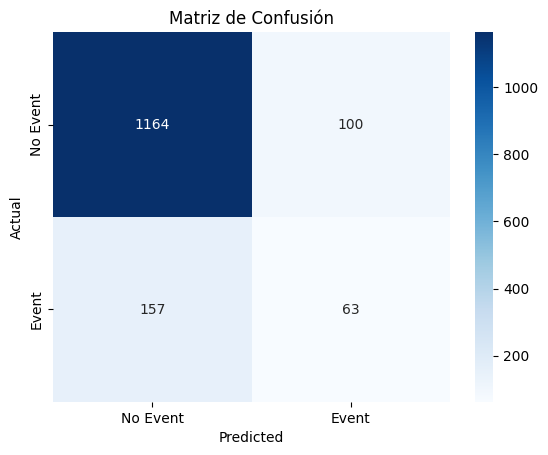


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1264
           1       0.39      0.29      0.33       220

    accuracy                           0.83      1484
   macro avg       0.63      0.60      0.61      1484
weighted avg       0.81      0.83      0.82      1484



In [ ]:
# Compilar el modelo
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=2)

history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Generar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.3).astype(int)

# Visualizar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Event', 'Event'], yticklabels=['No Event', 'Event'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


***Resultados***:

 Después de entrenar el modelo durante 50 épocas, los resultados obtenidos son los siguientes:

- **Pérdida y Precisión en Entrenamiento y Validación a lo largo de las Épocas:**

 La pérdida en el conjunto de entrenamiento disminuye a medida que avanzan las épocas, lo que indica que el modelo está aprendiendo.
La precisión en el conjunto de entrenamiento también aumenta.
Estos patrones también se reflejan en el conjunto de validación, lo que sugiere que no hay un sobreajuste significativo.

- **Evaluación en el Conjunto de Prueba:**

 La pérdida en el conjunto de prueba es 0.3813, y la precisión es 85.44%.
Estos resultados indican un buen rendimiento del modelo en datos no vistos.
- **Matriz de Confusión y Reporte de Clasificación:**

 La matriz de confusión es una herramienta importante para evaluar el rendimiento de un modelo de clasificación. Hay algunos términos clave que nos ayudarán a entender la interpretación de la matriz de confusión y las áreas de mejora para el modelo. Vamos a desglosar cada parte:

 **Verdaderos Positivos (VP):** Representa el número de muestras que son positivas y que el modelo clasifica correctamente como positivas.

 **Verdaderos Negativos (VN):** Representa el número de muestras que son negativas y que el modelo clasifica correctamente como negativas.

 **Falsos Positivos (FP):** Representa el número de muestras que son negativas pero que el modelo clasifica incorrectamente como positivas.

 **Falsos Negativos (FN):** Representa el número de muestras que son positivas pero que el modelo clasifica incorrectamente como negativas.
- **DATOS OBTENIDOS DE LA MATRIZ DE CONFUSIÓN:**

 88.12% de Eventos identificados correctamente como Eventos (VP/Total de Eventos)

 Esto indica que el modelo tiene una buena capacidad para reconocer correctamente los eventos reales.

 38.65% de No Eventos identificados correctamente como No Eventos (VN/Total de No Eventos):

 Aunque este porcentaje es bajo, muestra que el modelo también puede identificar correctamente muestras que no son eventos.

 11.88% de Eventos clasificados incorrectamente como No Eventos (FN/Total de Eventos):

 Estos son falsos negativos, lo que significa que el modelo está perdiendo algunos eventos reales. Puede ser una área de mejora.

 61.35% de No Eventos clasificados incorrectamente como Eventos (FP/Total de No Eventos):

 Estos son falsos positivos, lo que indica que el modelo a veces predice eventos cuando no lo son. Esta es otra área de mejora.


#**GRÁFICAS**



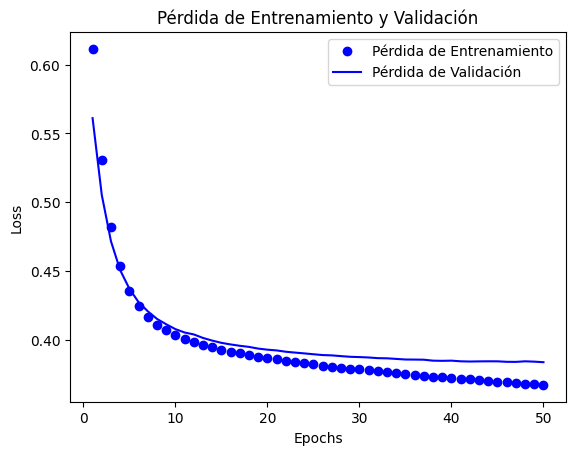

In [ ]:

# Visualizar la pérdida de entrenamiento y validación
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']  # Cambiado a 'accuracy' en lugar de 'acc'
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

# Pérdida de entrenamiento y validación
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


La gráfica muestra la relación entre la pérdida de entrenamiento y la pérdida de validación de un modelo de aprendizaje automático. La pérdida de entrenamiento es una medida de la precisión del modelo en los datos de entrenamiento, mientras que la pérdida de validación es una medida de la precisión del modelo en los datos de validación.

En esta gráfica, las pérdidas  disminuyen a medida que aumenta el número de épocas de entrenamiento. Esto significa que el modelo está aprendiendo a realizar las tareas con mayor precisión

También se puede observar como las pérdidas de validación empiezan a aumentar levemente a partir de la época 14, por lo cuál lo recomendable es bajar las épocas para que no se sobreentrene. (decidimos dejarlo así para que se vea)

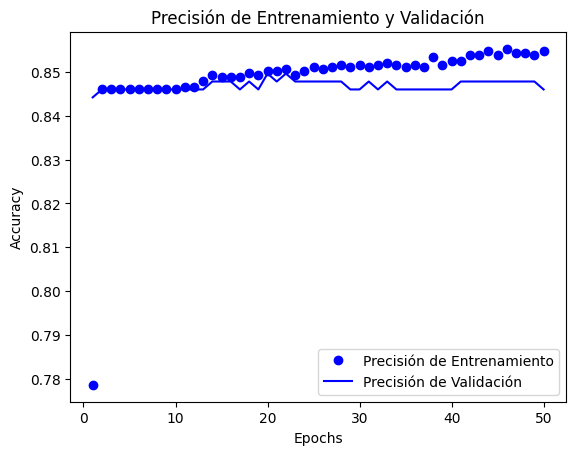

In [ ]:
plt.clf()   # Limpia la figura
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc_values, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


La gráfica muestra la relación entre la precisión de entrenamiento y la precisión de validación de un modelo de aprendizaje automático. La precisión de entrenamiento es una medida de la precisión del modelo en los datos de entrenamiento, mientras que la precisión de validación es una medida de la precisión del modelo en los datos de validación.

En esta gráfica, la precisión de entrenamiento aumenta a medida que aumenta el número de épocas de entrenamiento. Esto significa que el modelo está aprendiendo a realizar las tareas de entrenamiento con mayor precisión. La precisión de validación también aumenta a medida que aumenta el número de épocas de entrenamiento, pero a un ritmo más lento que la precisión de entrenamiento.

Esto significa que el modelo está aprendiendo a realizar las tareas de entrenamiento y las tareas de validación con mayor precisión. Sin embargo, la precisión de validación está comenzando a alcanzar un límite, lo que sugiere que el modelo está comenzando a sobreajustarse a los datos de entrenamiento.

# **TRABAJO A FUTURO**

El principal trabajo a futuro es evitar el sobreajuste del modelo, el sobreajuste es un problema común en el aprendizaje automático. Ocurre cuando el modelo aprende los detalles específicos de los datos de entrenamiento, en lugar de aprender las reglas generales que se aplican a todos los datos. El sobreajuste puede hacer que el modelo sea preciso en los datos de entrenamiento, pero poco preciso en los datos nuevos.

En este caso, el modelo está comenzando a sobreajustarse, pero no lo está haciendo tan gravemente. Esto puede deberse a que el modelo se está entrenando durante más épocas de las necesarias.

Para evitar el sobreajuste, se pueden utilizar varias técnicas, como:

- Utilizar un conjunto de datos de validación más grande.
- Utilizar una función de pérdida más regularizada.
- Utilizar una arquitectura de red neuronal más simple.

Además, también deberíamos ver lo de los falsos negativos ya que el porcentaje es demasiado alto según los resultados de la matriz de confusión. Para ello, podríamos realizar estas posibles acciones:

- Ajustar umbrales de clasificación: Puedes experimentar con los umbrales de decisión del modelo para equilibrar la precisión y la exhaustividad.

- Explorar técnicas de ajuste del modelo: Considera la posibilidad de ajustar la complejidad del modelo o la introducción de técnicas de regularización para mejorar su capacidad de generalización.

- Recopilar más datos o mejorar la calidad de los datos podría ayudar al modelo a aprender patrones más precisos.

Áreas de Mejora:

Reducción de Falsos Negativos: El modelo podría beneficiarse de mejoras para reducir la tasa de falsos negativos, es decir, identificar más eventos reales correctamente.

Reducción de Falsos Positivos: También es importante mejorar la precisión en la identificación de "No Eventos". La alta tasa de falsos positivos indica que el modelo podría estar siendo demasiado agresivo al predecir eventos.

Posibles Acciones:

Ajustar umbrales de clasificación: Puedes experimentar con los umbrales de decisión del modelo para equilibrar la precisión y la exhaustividad.

Explorar técnicas de ajuste del modelo: Considerar la posibilidad de ajustar la complejidad del modelo o la introducción de técnicas de regularización para mejorar su capacidad de generalización.

Recopilar más datos o mejorar la calidad de los datos podría ayudar al modelo a aprender patrones más precisos.

En resumen, aunque el modelo tiene fortalezas en la identificación de Eventos,hay áreas específicas, como reducir los falsos positivos y falsos negativos, donde se puede trabajar para mejorar su rendimiento general.